<a href="https://colab.research.google.com/github/mauricio201922/DataScience-2/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import random
from time import time
import calendar
from datetime import datetime

In [17]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# For splitting dataset
from sklearn.model_selection import ShuffleSplit, train_test_split

from sklearn.model_selection import learning_curve as curves
from sklearn.model_selection import learning_curve, validation_curve

# k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

# Import sklearn models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [18]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.7)
lasso = Lasso(alpha=0.1)
reg = Ridge(alpha = .5)
svr = SVR()
tree = DecisionTreeRegressor()
Forest = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
gbr = GradientBoostingRegressor()
lr = LinearRegression()

In [19]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [32]:
train_data = pd.read_csv("/content/drive/MyDrive/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/test.csv")
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [37]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [38]:
train_data["year"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
train_data["month"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[1])
train_data["day"] = train_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
train_data["hour"] = train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
train_data = train_data.drop('datetime', axis=1)

In [39]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [40]:
test_data["year"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
test_data["month"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[1])
test_data["day"] = test_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
test_data["hour"] = test_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
test_features = test_data.drop('datetime', axis=1)

In [41]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04


In [55]:
df = pd.DataFrame()
df['c'] = train_data['count']
df['hour'] = train_data['hour']
df.shape

(10886, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


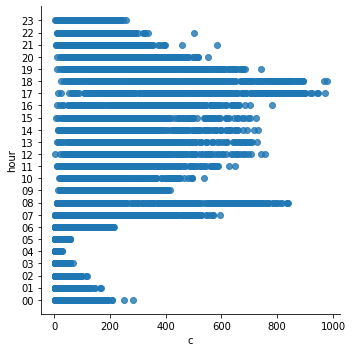

In [56]:
sns.lmplot('c', 'hour', data=df, fit_reg=False)

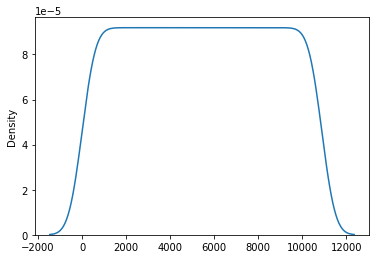

In [61]:
sns.kdeplot(df.index)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


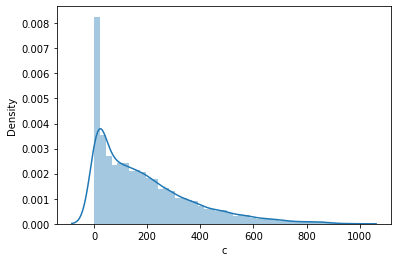

In [53]:
sns.distplot(df.c)

In [62]:
target = train_data['count']
features = train_data.drop(['casual','registered','count'], axis=1)

In [63]:
features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,2011,01,01,00
1,1,0,0,1,9.02,13.635,80,0.0,2011,01,01,01
2,1,0,0,1,9.02,13.635,80,0.0,2011,01,01,02
3,1,0,0,1,9.84,14.395,75,0.0,2011,01,01,03
4,1,0,0,1,9.84,14.395,75,0.0,2011,01,01,04


In [64]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(features)
scaled_test_features = MinMaxScaler().fit_transform(test_features)

In [65]:
test_features.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04


In [66]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size= 0.3,random_state=42)

In [67]:
def train_and_predict_model(model, model_name, X_train, X_test, y_train, y_test, selected_cols):
    t0 = time()
    model.fit(X_train, y_train)
    train_time = time() - t0
    
    t1 = time()
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    predict_time = time() - t1
    
    train_score = r2_score(y_train, train_pred)
    
    test_score = r2_score(y_test, test_pred)
    
    root_mean_squared_log_error = rmsle(y_test, test_pred)
    
    print ("r2_score of training set of {} is {}".format(model_name, train_score))
    print ("r2_score of testing set of {} is {}".format(model_name, test_score))
    print ("Root mean squared log error of {} is {}".format(model_name, root_mean_squared_log_error))
    print ("cross_val_score of {} is {}".format(model_name, cross_val_score(model, features, target , cv = 10).mean()))
    
    print ("Time taken to train {} is {}".format(model_name, train_time))
    print ("Time taken to predict {} is {}".format(model_name, predict_time))
    return model

In [68]:
total_features = list(features.columns)
print (total_features)
#selected_features = ['hour', 'temp', 'workingday']
model = train_and_predict_model(Forest, 'Forest', X_train, X_test, y_train, y_test, total_features)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
r2_score of training set of Forest is 0.9917598258233377
r2_score of testing set of Forest is 0.9440490800180422
Root mean squared log error of Forest is 0.3489396234526474
cross_val_score of Forest is 0.7966267431991869
Time taken to train Forest is 4.652217626571655
Time taken to predict Forest is 0.3721928596496582


In [69]:
len(total_features)

12

In [70]:
pred = model.predict(scaled_test_features)

In [71]:
test_data['count'] = pred
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00,11.300000
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01,4.946667
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02,5.306667
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03,2.706667
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04,2.706667


In [72]:
df = test_data[['datetime', 'count']]
df.to_csv('submission.csv', index = False)
df.head()

,datetime,count
0,2011-01-20 00:00:00,11.300000
1,2011-01-20 01:00:00,4.946667
2,2011-01-20 02:00:00,5.306667
3,2011-01-20 03:00:00,2.706667
4,2011-01-20 04:00:00,2.706667


In [73]:
def draw_feature_imp(model, features):
    from matplotlib import pyplot
    importance = model.feature_importances_
    names = list(features)
    pyplot.bar(range(len(importance)), importance)
    print (sorted(zip(map(lambda x: round(x, 4), importance), names), 
                 reverse=True))
    pyplot.show()

[(0.5911, 'hour'), (0.0907, 'workingday'), (0.0827, 'year'), (0.0705, 'atemp'), (0.0439, 'month'), (0.0386, 'temp'), (0.0274, 'humidity'), (0.0163, 'season'), (0.0143, 'weather'), (0.0124, 'day'), (0.0098, 'windspeed'), (0.0025, 'holiday')]


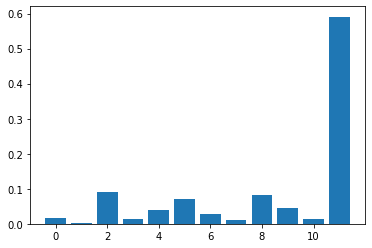

In [74]:
draw_feature_imp(Forest, features)

In [75]:
selected_features = ['hour', 'year', 'workingday', 'temp', 'atemp', 'atemp']

In [76]:
selected_features

['hour', 'year', 'workingday', 'temp', 'atemp', 'atemp']